## 1° PROYECTO INDIVIDUAL -2da parte

### 1) Importación de librerías

In [147]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import skew
from math import sqrt
from numpy import mean, var
import copy 
from sklearn import preprocessing
import json

### 2) Lectura de archivo csv como dataframe

In [148]:
df=pd.read_csv('PI1.csv') 
df.head(2) 

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore,release_year
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.49,http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro,NaN,NaN,2018
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN,2018


In [149]:
# Analizamos estructura del dataset
df.shape

(29894, 17)

### 3) Transformaciones

In [150]:
df.columns

Index(['publisher', 'genres', 'app_name', 'title', 'url', 'release_date',
       'tags', 'discount_price', 'reviews_url', 'specs', 'price',
       'early_access', 'id', 'developer', 'sentiment', 'metascore',
       'release_year'],
      dtype='object')

#### Modificaciones en datos de tipo fecha

In [151]:
# Borramos valores nulos
df = df.dropna(subset = ['release_date'])
df.release_date.isna().sum()

0

In [152]:
# Transformamos el formato de fecha de 'release_date' a 'aaaa-mm-dd' si el formato es incorrecto
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce').dt.strftime('%Y-%m-%d')

In [153]:
# Creamos la columna 'release_year' extrayendo el año de 'release_date'
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
df['release_year'] = df['release_year'].astype('Int64')

In [154]:
df[['release_date','release_year']]

,release_date,release_year
0,2018-01-04,2018
1,2018-01-04,2018
2,2017-07-24,2017
3,2017-12-07,2017
4,2018-01-04,2018
...,...,...
29889,2018-01-04,2018
29890,2018-01-04,2018
29891,2018-01-04,2018
29892,2018-01-04,2018


In [155]:
df.release_year.unique()

<IntegerArray>
[2018, 2017, 1997, 1998, 2016, 2006, 2005, 2003, 2007, 2002, 2000, 1995, 1996,
 1994, 2001, 1993, 2004, 1999, 2008, 2009, 1992, 1989, 2010, 2011, 2013, 2012,
 2014, 1983, 1984, 2015, 1990, 1988, 1991, 1985, 1982, 1987, 1981, 1986, 2021,
 2019, 1975, 1970, 1980]
Length: 43, dtype: Int64

In [156]:
# Borramos valores nulos nuevamente
df = df.dropna(subset = ['release_date'])
df.release_date.isna().sum()

0

In [157]:
# Borramos valores nulos nuevamente
df = df.dropna(subset = ['release_year'])
df.release_date.isna().sum()

0

In [158]:
df.isna().sum()

publisher          6006
genres             1234
app_name              1
title                 1
url                   0
release_date          0
tags                161
discount_price    29690
reviews_url           1
specs               669
price              1076
early_access          0
id                    1
developer          1250
sentiment          6738
metascore         27341
release_year          0
dtype: int64

In [159]:
df.shape

(29894, 17)

### 4) Entendiendo los datos

#### a) Calidad de los datos

In [160]:
print(df.info())  # Información general del dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29894 entries, 0 to 29893
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       23888 non-null  object 
 1   genres          28660 non-null  object 
 2   app_name        29893 non-null  object 
 3   title           29893 non-null  object 
 4   url             29894 non-null  object 
 5   release_date    29894 non-null  object 
 6   tags            29733 non-null  object 
 7   discount_price  204 non-null    float64
 8   reviews_url     29893 non-null  object 
 9   specs           29225 non-null  object 
 10  price           28818 non-null  object 
 11  early_access    29894 non-null  bool   
 12  id              29893 non-null  float64
 13  developer       28644 non-null  object 
 14  sentiment       23156 non-null  object 
 15  metascore       2553 non-null   float64
 16  release_year    29894 non-null  Int64  
dtypes: Int64(1), bool(1), float64(3

In [161]:
# Convertimos la columna 'price' y 'title' a tipo numérico
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['title'] = pd.to_numeric(df['title'], errors='coerce')

# Verificamos el tipo de datos después de la conversión
print(df['price'].dtype)
print(df['title'].dtype)

float64
float64


In [162]:
print(df.isnull().sum())  # Contamos los valores nulos en cada columna.

publisher          6006
genres             1234
app_name              1
title             29887
url                   0
release_date          0
tags                161
discount_price    29690
reviews_url           1
specs               669
price              2655
early_access          0
id                    1
developer          1250
sentiment          6738
metascore         27341
release_year          0
dtype: int64


### Borrar columna o columnas

In [163]:
df.describe()  # Estadísticas descriptivas de las variables numéricas

,title,discount_price,price,id,metascore,release_year
count,7.000000,204.000000,27239.000000,2.989300e+04,2553.000000,29894.0
mean,739.304286,12.605392,9.367288,4.431206e+05,72.204857,2014.763498
std,873.102039,18.207547,16.462233,1.841744e+05,10.859459,3.505638
min,50.050000,0.490000,0.490000,1.000000e+01,20.000000,1970.0
25%,72.040000,0.890000,2.990000,3.211410e+05,66.000000,2014.0
50%,140.000000,4.090000,4.990000,4.371210e+05,74.000000,2016.0
75%,1429.500000,22.660000,9.990000,5.876400e+05,80.000000,2017.0
max,1982.000000,139.990000,995.000000,2.028850e+06,96.000000,2021.0


#### b) Visualizaciones

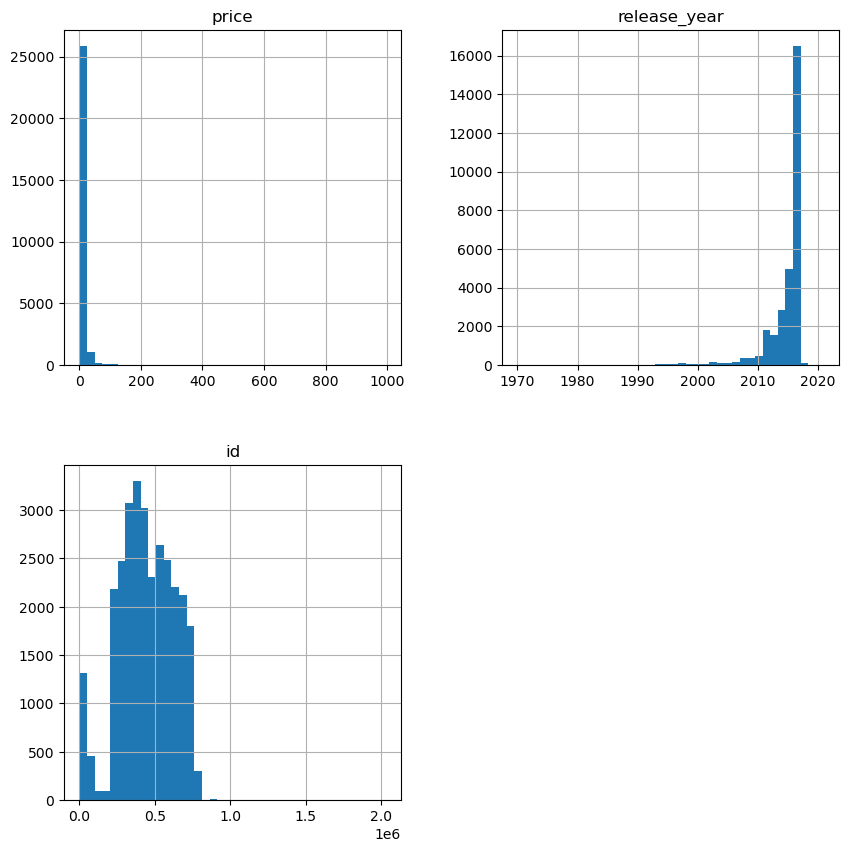

In [164]:
columnas = ['price', 'release_year', 'id']
df[columnas].hist(bins=40, figsize= (10, 10))
plt.show()

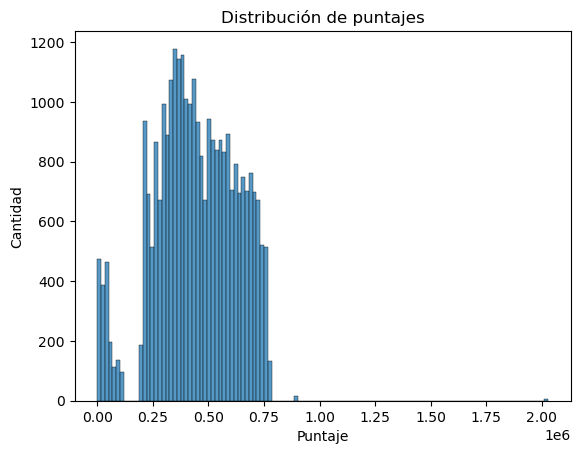

In [165]:
# Puntajes
sns.histplot(df['id'])
plt.xlabel('Puntaje')
plt.ylabel('Cantidad')
plt.title('Distribución de puntajes')
plt.show()

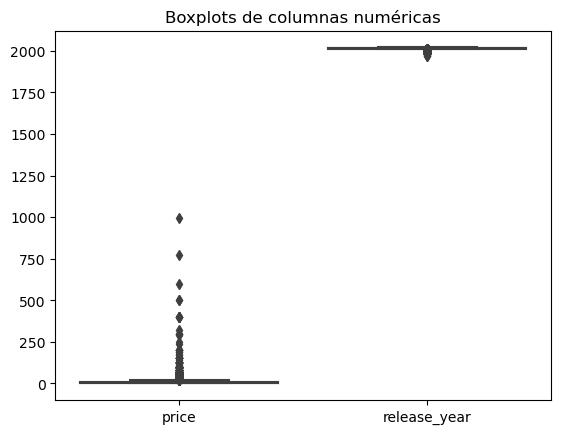

In [166]:
# Outliers

sns.boxplot(data=df[['price', 'release_year']])
plt.title('Boxplots de columnas numéricas')
plt.show()

In [167]:
# Se observan muchos outliers en precio (price). Evaluaremos la conveniencia de su filtrado para nuestro modelo de recomendación.

#### c) Correlaciones

C:\Users\usuario\AppData\Local\Temp\ipykernel_1104\3169171290.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


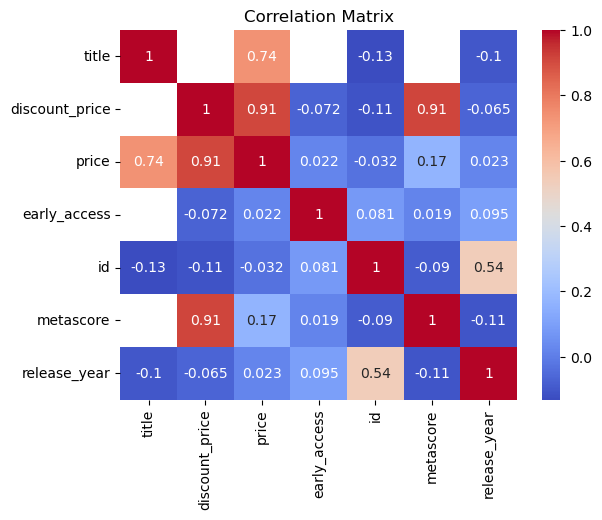

In [168]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

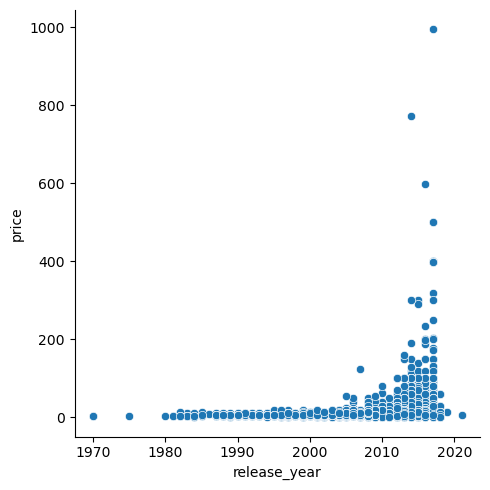

In [169]:
sns.relplot(x='release_year',y='price', data=df) 

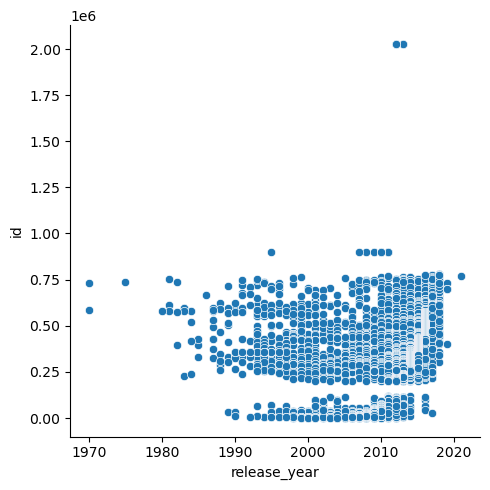

In [170]:
sns.relplot(x='release_year',y='id', data=df)

#### d) Fechas

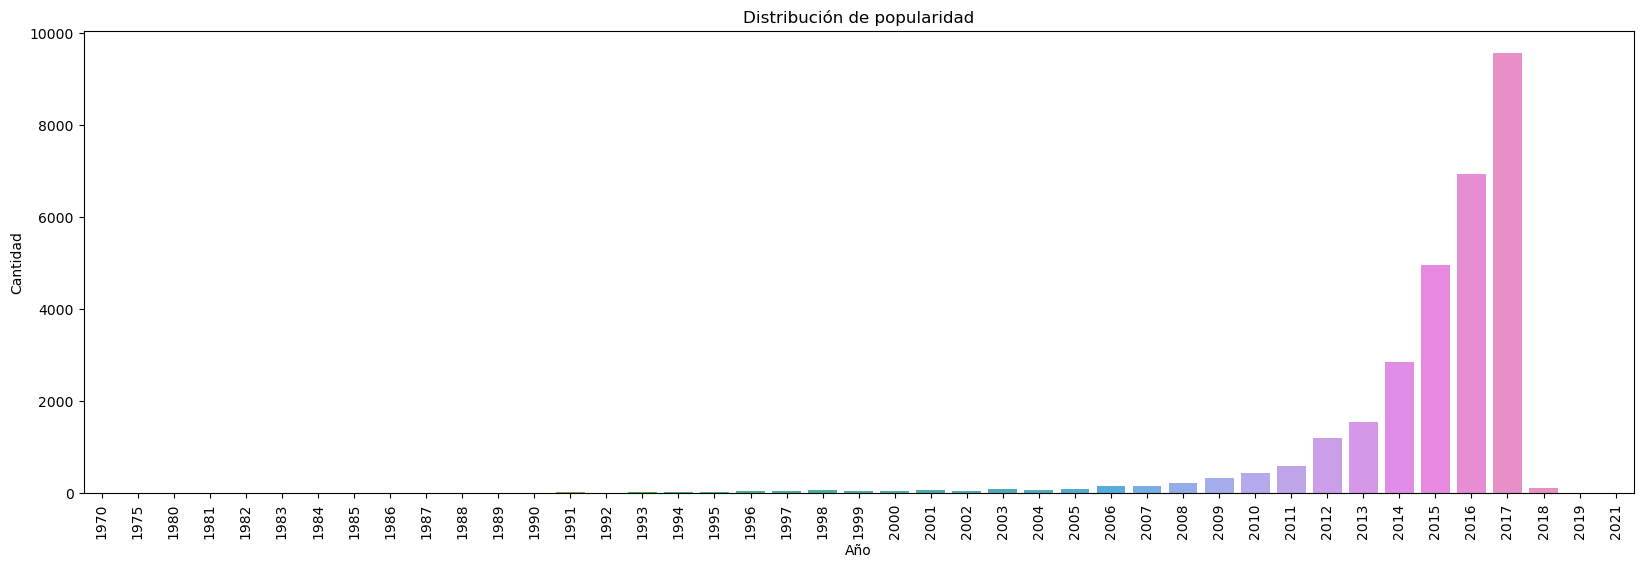

In [171]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='release_year')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Distribución de popularidad')
plt.xticks(rotation=90)
plt.show()

In [172]:
# Vemos como el número de videojuegos por año aumentó con el paso del tiempo. Es a partir de 1996 que se observa un crecimiento en la cantidad de videojuegos por año.

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

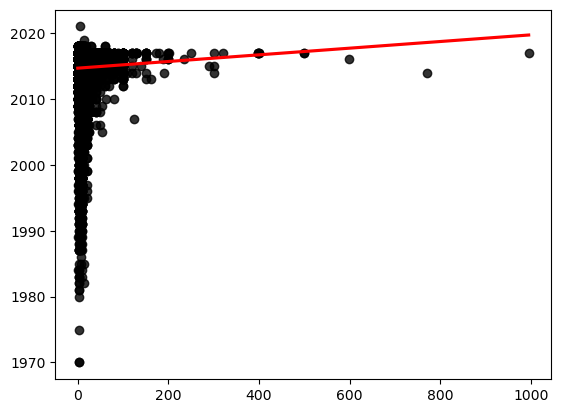

In [178]:
# Regresión lineal de ecuación de la recta:
sns.regplot(x="price", y="release_year", data=df, scatter_kws={"color": "black"}, 
line_kws={"color": "red"})

In [ ]:
from sklearn.metrics import mean_squared_error

In [179]:
#Pendiente (slope) e Intercepto (intercept) de X1: y = Slope(m)x + Intercept(b)
x = df["price"]
y = df["release_year"]
slope_intercept = np.polyfit(x,y,1)

print(slope_intercept)
# Ejemplo: y = -0.4478604x + 5.48819523


UFuncTypeError: Cannot cast ufunc 'lstsq_n' input 1 from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [180]:
mse = mean_squared_error(x, y)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

ValueError: Input contains NaN.